In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install tensorflow
# !pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import random
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar',
           'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(url, names=columns)

In [ ]:
# Separate features and labels
X = data.drop('letter', axis=1).values
y = data['letter'].values

In [ ]:
# Encode labels (A-Z -> 0-25)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 letters A-Z
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4358 - loss: 2.1264 - val_accuracy: 0.7669 - val_loss: 0.8175
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7888 - loss: 0.7388 - val_accuracy: 0.8194 - val_loss: 0.5877
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8398 - loss: 0.5394 - val_accuracy: 0.8694 - val_loss: 0.4536
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8742 - loss: 0.4285 - val_accuracy: 0.8863 - val_loss: 0.3794
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8997 - loss: 0.3356 - val_accuracy: 0.8994 - val_loss: 0.3320
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9108 - loss: 0.2966 - val_accuracy: 0.9087 - val_loss: 0.2931
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9242 - loss: 0.2608 - val_accuracy: 0.9169 - val_loss: 0.2665
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9305 - loss: 0.2354 - val_accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9505


In [ ]:
# Save the model
model.save("DNN.h5")

In [ ]:
# Make predictions (optional)
y_pred = model.predict(X_test)
predicted_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Random sample prediction function
def random_sample_predict(model, scaler, label_encoder, X_test, y_test):
    # Pick a random index
    idx = random.randint(0, len(X_test) - 1)

    # Select random sample
    sample = X_test[idx].reshape(1, -1)
    true_label = np.argmax(y_test[idx])
    true_letter = label_encoder.inverse_transform([true_label])[0]

    # Predict
    prediction = model.predict(sample)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_letter = label_encoder.inverse_transform(predicted_class)[0]

    print(f"\n--- Random Sample Test ---")
    print(f"True Letter: {true_letter}")
    print(f"Predicted Letter: {predicted_letter}")

# Call this function after model training
random_sample_predict(model, scaler, label_encoder, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

--- Random Sample Test ---
True Letter: A
Predicted Letter: A


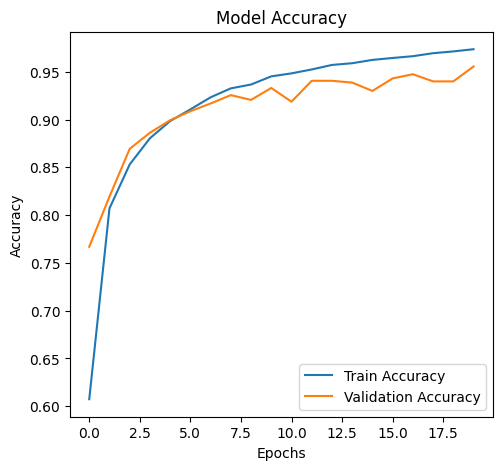

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

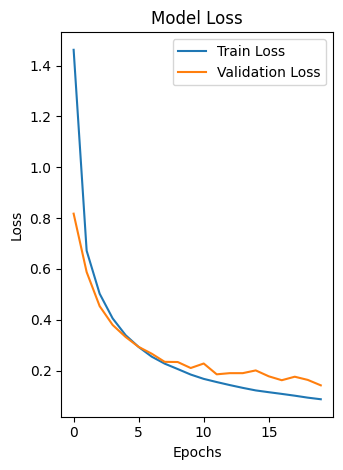

In [ ]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()